       Word Count
count  100.000000
mean    16.090000
std     10.524714
min      2.000000
25%      9.750000
50%     14.500000
75%     20.250000
max     51.000000


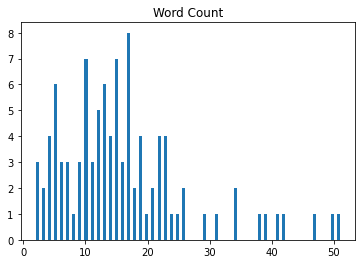

In [5]:
'''
David House
9/11/2020

Goals: Analyse the word count of the titles of the top reddit posts in r/pics
'''

import json
import pandas as pd

#loads in data retrieved from https://json.reddit.com/r/pics/top/?limit=100&t=all
reddit_file = open("../data/pics.json")
reddit_data = json.load(reddit_file)
    
#Digs deeper into the reddit_data until we reach a list
initial_trim = reddit_data['data']['children']

#Dictionary to count the number of words in each title
title_word_count = {}

#iterates through list to retrieve the title of each post
for x in initial_trim:
    title_word_count[x['data']['title']] = [len(x['data']['title'].split())]

# Create DataFrame so that the Titles are the indicies and it has a single column 'Word Count'
final_data_frame = pd.DataFrame.from_dict(title_word_count).T
final_data_frame.columns = ['Word Count']

#Sort the values
final_data_frame.sort_values(by=['Word Count'],ascending=True,inplace=True)

#Print Descriptive statistics and a histogram of the data
print(final_data_frame.describe())
plot = final_data_frame.hist(bins=100, grid=False)